In [22]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# Load data into pandas

In [23]:
# show content of behavioral data directory
behav_data = glob.glob('../behav_data/*.csv')
behav_data

['../behav_data/sub11_block2_behav.csv',
 '../behav_data/sub17_block6_behav.csv',
 '../behav_data/sub06_block1_behav.csv',
 '../behav_data/sub15_allblocks_behav.csv',
 '../behav_data/sub06_behav.csv',
 '../behav_data/sub01_block4_behav.csv',
 '../behav_data/sub10_block3_behav.csv',
 '../behav_data/sub08_block6_behav.csv',
 '../behav_data/sub14_allblocks_behav.csv',
 '../behav_data/sub12_behav.csv',
 '../behav_data/sub04_block3_behav.csv',
 '../behav_data/sub15_block4_behav.csv',
 '../behav_data/sub17_allblocks_behav.csv',
 '../behav_data/sub16_allblocks_behav.csv',
 '../behav_data/sub14_block5_behav.csv',
 '../behav_data/sub05_block2_behav.csv',
 '../behav_data/sub12_block1_behav.csv',
 '../behav_data/sub03_block6_behav.csv',
 '../behav_data/sub10_block5_behav.csv',
 '../behav_data/sub01_block2_behav.csv',
 '../behav_data/sub10_allblocks_behav.csv',
 '../behav_data/sub09_allblocks_behav.csv',
 '../behav_data/sub16_block1_behav.csv',
 '../behav_data/sub07_block6_behav.csv',
 '../behav_d

In [24]:
# create a single df from all csv files
n_subs = 17
n_blocks = 6

dfs = []
csv_files = []
for sub_idx in range(1,n_subs+1):
    for block_idx in range(1, n_blocks+1):
        csvfile = '../behav_data/sub%02d_block%i_behav.csv' % (sub_idx, block_idx)
        csv_files.append(csvfile)
        block_df = pd.read_csv(csvfile)
        dfs.append(block_df)

df = pd.concat(dfs, axis = 0, ignore_index = True)

assert len(df) == n_subs * n_blocks * 64

In [25]:
# manage data types of some columnes
df['acc'] = df.accuracy.astype('float')

In [26]:
df.head()

,vision,rotation,file_path,object_id,object_name,set,Geschlecht,SubjectID,Alter,Rechtshaendig,...,distr_pos,distractors,rt,accuracy,clicked_distractor,mouse_pressed,keys,ran,block,acc
0,ri_percept,315,./Stimuli/percepts/408_r315_ri_percept.png,408,Wuerfel,training,maennlich,1,23,True,...,"[[-9.5, -6], [0.0, -6.0], [-9.5, -9], [0, -9],...","['Knoblauch', 'Rahmen', 'Tasse', 'Locher', 'Hu...",NaN,0,NaN,NaN,[],True,1,0.0
1,ri_percept,0,./Stimuli/percepts/263_r0_ri_percept.png,263,Rahmen,training,maennlich,1,23,True,...,"[[-9.5, -6], [9.5, -6], [-9.5, -9], [0, -9], [...","['Tacker', 'Knoblauch', 'Wuerfel', 'Gluehbirne...",NaN,0,NaN,NaN,[],True,1,0.0
2,ri_percept,180,./Stimuli/percepts/642_r180_ri_percept.png,642,Tacker,training,maennlich,1,23,True,...,"[[0.0, -6.0], [9.5, -6], [-9.5, -9], [0, -9], ...","['Rahmen', 'Tasse', 'Knoblauch', 'Wuerfel', 'L...",2.750681,0,Rahmen,True,[],True,1,0.0
3,ri_percept,135,./Stimuli/percepts/405_r135_ri_percept.png,405,Locher,training,maennlich,1,23,True,...,"[[-9.5, -6], [0.0, -6.0], [-9.5, -9], [0, -9],...","['Gluehbirne', 'Wuerfel', 'Hut', 'Knoblauch', ...",NaN,0,NaN,NaN,[],True,1,0.0
4,ri_percept,90,./Stimuli/percepts/125_r90_ri_percept.png,125,Tasse,training,maennlich,1,23,True,...,"[[-9.5, -6], [0.0, -6.0], [9.5, -6], [-9.5, -9...","['Hut', 'Locher', 'Knoblauch', 'Tacker', 'Wuer...",4.951150,0,Wuerfel,True,[],True,1,0.0


# Plot

In [27]:
# set figure aesthetics
sns.set_style("ticks", {'axes.grid' : True, 'grid.color':'.9'})
sns.set_context('notebook', font_scale=1.5, rc={"lines.linewidth": 2.5, 'grid.linewidth':1.5})

In [28]:
# create legend labels
legend_labels = np.unique([
    sub_path.split('/')[-1].split('_')[0]
    for sub_path in csv_files
])

legend_labels

array(['sub01', 'sub02', 'sub03', 'sub04', 'sub05', 'sub06', 'sub07',
       'sub08', 'sub09', 'sub10', 'sub11', 'sub12', 'sub13', 'sub14',
       'sub15', 'sub16', 'sub17'], dtype='|S5')

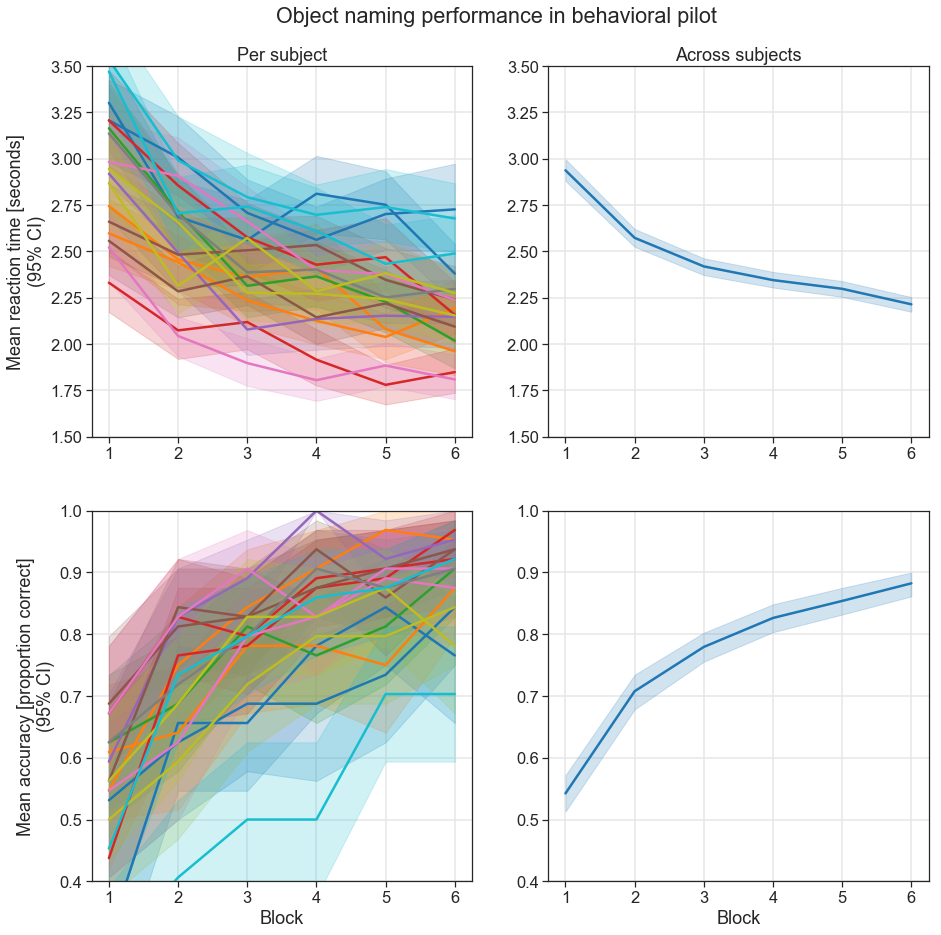

In [30]:
fig, axes = plt.subplots(figsize=(15,15), ncols=2, nrows=2)

fig.suptitle("Object naming performance in behavioral pilot", y=.935)

figkwargs = {'err_style':'band', 'ci':95, 'data':df, 'x':'block', 'legend': False}

# RT by subject
sns.lineplot(y="rt", hue="SubjectID", ax=axes[0][0], palette='tab10', **figkwargs)
# axes[0][0].legend(legend_labels)  # no legend bc too many subs
axes[0][0].set(xlabel="", ylabel="Mean reaction time [seconds]\n(95% CI)", title='Per subject', ylim=(1.5, 3.5))

# RT across subjects
sns.lineplot(y="rt", ax=axes[0][1], **figkwargs)
axes[0][1].set(ylabel='', xlabel='', title='Across subjects', ylim=(1.5, 3.5))
#axes[0][1].yaxis.set_ticklabels([])

# Accuracies by subject
sns.lineplot(y="acc", hue='SubjectID', palette='tab10', ax=axes[1][0], **figkwargs)
axes[1][0].set(ylabel="Mean accuracy [proportion correct]\n(95% CI)", ylim=(.4, 1), xlabel='Block')
# axes[1][0].legend(legend_labels)

# Accuracies across subjects
sns.lineplot(y="acc",ax=axes[1][1], **figkwargs)
axes[1][1].set(ylim=(.4,1), xlabel="Block", ylabel='')

fig.savefig('./behav_data.png', dpi=300)